# Base de plots para Mecânica Celeste
<img src = "../Valongo.png" style="width: 270px;"/>
<br>

### Importando bibliotecas...

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import scipy.integrate as integrate
import scipy.special as special
from scipy import interpolate
from scipy.misc import derivative
from sympy import symbols, Eq, solve
import sympy as sym
from scipy.integrate import odeint

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.optimize import curve_fit

# Simulações de 1 ~ 4 foram descartadas devido ao pequeno tempo de integração.
 - Decidi deixá-las para possíveis análises interessantes que podem vir.
 - Pular para Simulação 5 para a análise mais concisa)

### Simulação 1  (Descartada por ter integração curta demais)
    - Para o caso do TNO com inclinação inicial 0°

 - Parte do princípio de que todos as inclinações e ângulos do TNO são nulos no início do cálculo.

 - Integração de 100.000 anos,com cada output de 1000 em 1000 anos. Passo de integração de 20 anos. Poderíamos ter feito de 8 anos, que seria mais adequado para essa análise, mas não será necessário tanta precisão.

In [2]:
df_n = pd.read_csv('../Mercury/Mercury2017/Netuno.aei', header = 1, delim_whitespace=True)
df_t = pd.read_csv('../Mercury/Mercury2017/TNO.aei', header = 1, delim_whitespace=True)

In [3]:
elements_n = pd.DataFrame(data = df_n.values,columns = ['Tempo (anos)', 'a', 'e', 'i', 'Peri', 'nó', 'M(anomalia)', 'x', 'y', 'z', 'Vx', 'Vy', 'Vz', 'Massa','Ghost'])
Netuno = elements_n.drop(columns='Ghost')
Netuno

,Tempo (anos),a,e,i,Peri,nó,M(anomalia),x,y,z,Vx,Vy,Vz,Massa
0,0.0,30.0,0.008600,1.77,264.9999,44.97,0.0001,19.0959,-22.7837,-0.9152,0.0024,0.0020,-0.0000,0.000051
1,1000.0,30.0,0.008600,1.77,265.0092,44.97,30.8962,28.2125,-9.4962,-0.8238,0.0010,0.0030,0.0000,0.000051
2,2000.0,30.0,0.008599,1.77,265.0154,44.97,61.7955,29.1487,6.5507,-0.4934,-0.0007,0.0031,0.0001,0.000051
3,3000.0,30.0,0.008597,1.77,265.0168,44.97,92.6994,21.7101,20.7252,-0.0210,-0.0021,0.0023,0.0001,0.000051
4,4000.0,30.0,0.008596,1.77,265.0135,44.97,123.6081,8.1078,29.0298,0.4576,-0.0030,0.0009,0.0001,0.000051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996000.0,30.0,0.008595,1.77,264.9986,44.97,181.7930,-20.1304,22.5704,0.9331,-0.0023,-0.0021,0.0000,0.000051
997,997000.0,30.0,0.008595,1.77,264.9905,44.97,212.7065,-28.7523,9.2586,0.8304,-0.0009,-0.0030,-0.0000,0.000051
998,998000.0,30.0,0.008596,1.77,264.9844,44.97,243.6180,-29.3748,-6.6234,0.4967,0.0007,-0.0030,-0.0001,0.000051
999,999000.0,30.0,0.008597,1.77,264.9822,44.97,274.5257,-21.7496,-20.6365,0.0238,0.0022,-0.0023,-0.0001,0.000051


In [4]:
elements_t = pd.DataFrame(data = df_t.values,columns = ['Tempo (anos)', 'a', 'e', 'i', 'Peri', 'nó', 'M(anomalia)', 'x', 'y', 'z', 'Vx', 'Vy', 'Vz', 'Massa','Ghost'])
TNO = elements_t.drop(columns='Ghost')
TNO

,Tempo (anos),a,e,i,Peri,nó,M(anomalia),x,y,z,Vx,Vy,Vz,Massa
0,0.0,70.00000,0.200000,0.0000,0.0000,0.0000,0.0000,56.0000,0.0000,0.0000,0.0000,0.0025,0.0,0.0
1,1000.0,69.98180,0.199810,0.0001,189.7031,170.3119,254.9587,-43.9672,-61.9618,0.0002,0.0017,-0.0008,0.0,0.0
2,2000.0,69.97390,0.199865,0.0005,211.7322,148.3114,149.8789,-77.3019,29.1750,0.0002,-0.0007,-0.0015,0.0,0.0
3,3000.0,70.00236,0.199958,0.0007,226.4514,133.6516,44.7674,27.0085,55.5668,-0.0007,-0.0019,0.0013,0.0,0.0
4,4000.0,69.97378,0.199817,0.0008,214.7476,145.3348,299.7302,8.7754,-64.8541,0.0007,0.0021,0.0007,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996000.0,69.99674,0.199210,0.2276,235.0341,132.2194,122.3183,-65.8743,43.8490,0.0767,-0.0012,-0.0013,0.0,0.0
997,997000.0,69.97660,0.199296,0.2278,234.9704,132.2343,17.3097,47.6090,31.3429,-0.2239,-0.0012,0.0022,-0.0,0.0
998,998000.0,69.98866,0.199236,0.2280,234.9903,132.1851,272.2687,-16.2434,-70.3194,0.2359,0.0020,-0.0001,-0.0,0.0
999,999000.0,69.99024,0.199123,0.2281,235.0356,132.1825,167.2000,-83.6554,2.2235,0.2408,-0.0001,-0.0017,0.0,0.0


In [5]:
#Definindo variáveis de tempo para os plots
TNO_t = TNO['Tempo (anos)']
Netuno_t = Netuno['Tempo (anos)']

In [6]:
#Criando variável longitude do pericentro (do TNO) --> teste
TNO_no = TNO['nó']
TNO_arg = TNO['Peri']
TNO_long = TNO_no + TNO_arg
TNO_e = TNO['e']

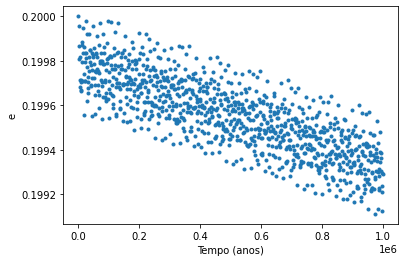

In [7]:
plt.plot(TNO_t, TNO_e,'.')
#plt.axvline(24000, color='r', linestyle='dotted', linewidth=2)
plt.xlabel('Tempo (anos)')
plt.ylabel('e')
plt.show()

In [8]:
###### Plotando informações relativas à inclinação e ângulo do TNO

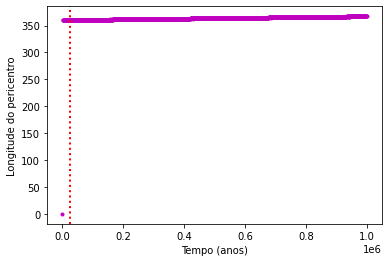

In [9]:
plt.plot(TNO_t, TNO_long,'m.')
plt.axvline(24000, color='r', linestyle='dotted', linewidth=2)
plt.xlabel('Tempo (anos)')
plt.ylabel('Longitude do pericentro')
plt.show()

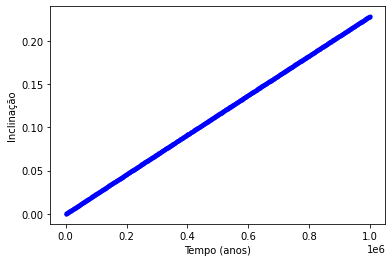

In [10]:
TNO_i = TNO['i']
plt.plot(TNO_t, TNO_i,'b.')
#plt.axhline(0.0001, color='y', linestyle='dotted', linewidth=2) #A partir de inclinação 0.0001 graus, a longitude do pericentro para de variar consideravelmente
#plt.axvline(1000, color='r', linestyle='dotted', linewidth=2) # Que chega a partir dos 1.000 anos
plt.xlabel('Tempo (anos)')
plt.ylabel('Inclinação')
plt.show()

 - Manipulando um pouco o gráfico a fim de observar mais de perto, vemos que na verdade há um aumento linear do ângulo da longitude do pericentro. Unico ponto que não há qualquer variação é o início (onde a inclinação do TNO é exatamente 0°).

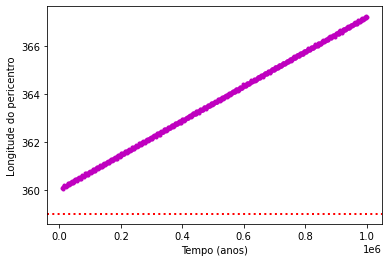

In [11]:
plt.plot(TNO_t[10:], TNO_long[10:],'m.')
plt.axhline(359, color='r', linestyle='dotted', linewidth=2)
plt.xlabel('Tempo (anos)')
plt.ylabel('Longitude do pericentro')
plt.show()

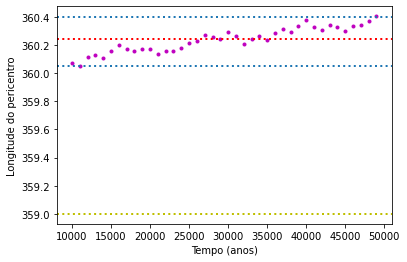

In [12]:
plt.plot(TNO_t[10:50], TNO_long[10:50],'m.')
plt.axhline(360.4, linestyle='dotted', linewidth=2) # Máximo
plt.axhline(360.24, color='r', linestyle='dotted', linewidth=2) # Médio
plt.axhline(360.05, linestyle='dotted', linewidth=2) # Mínimo
plt.axhline(359, color='y', linestyle='dotted', linewidth=2) # referencia
plt.xlabel('Tempo (anos)')
plt.ylabel('Longitude do pericentro')
plt.show()

 - Pegamos uma fatia do tempo onde a inclinação ainda é bem próxima de zero e vemos que a variação da longitude do pericentro não é tão alta.

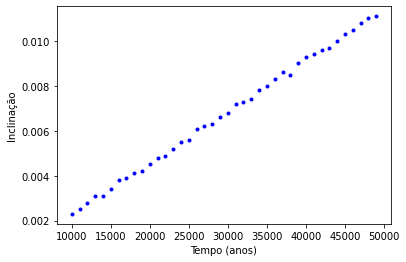

In [13]:
plt.plot(TNO_t[10:50], TNO_i[10:50],'b.')
#plt.axhline(0.0001, color='y', linestyle='dotted', linewidth=2) #A partir de inclinação 0.0001 graus, a longitude do pericentro para de variar consideravelmente
#plt.axvline(1000, color='r', linestyle='dotted', linewidth=2) # Que chega a partir dos 1.000 anos
plt.xlabel('Tempo (anos)')
plt.ylabel('Inclinação')
plt.show()

 - É possível observar que a longitude do pericentro vai do 0 até o 360° (começa a dar 'mais uma volta') assim que a inclinação começa aumentar.
 
 - Agora veremos conforme a inclinação aumenta ainda mais, o que ocorre com a variação da longitude do periastro. Antes tivemos uma variação da longitude de por volta de +0,335°, durante o mesmo espaço de tempo (40.000 anos) que a inclinação aumentou 0.008°

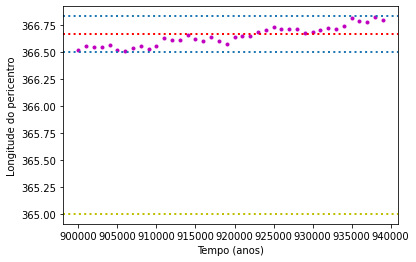

In [14]:
plt.plot(TNO_t[900:940], TNO_long[900:940],'m.')
plt.axhline(366.835, linestyle='dotted', linewidth=2) # Máximo
plt.axhline(366.67, color='r', linestyle='dotted', linewidth=2) # Médio
plt.axhline(366.5, linestyle='dotted', linewidth=2) # Mínimo
plt.axhline(365, color='y', linestyle='dotted', linewidth=2) # Referencia
plt.xlabel('Tempo (anos)')
plt.ylabel('Longitude do pericentro')
plt.show()

 - Aqui temos variações de +0.35° na longitude do pericentro, durante o mesmo espaço de tempo que a inclinação já passava dos 0.2° e subia para 0.215°. A variação de tempo foi a mesma em ambas situações (40.000 anos).

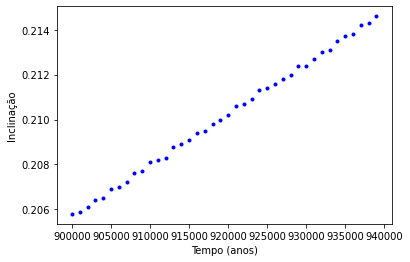

In [15]:
plt.plot(TNO_t[900:940], TNO_i[900:940],'b.')
plt.xlabel('Tempo (anos)')
plt.ylabel('Inclinação')
plt.show()

 - Até aqui vimos o que é esperado. Se desconsiderarmos o ponto inicial (por ser a condição escolhida arbitrariamente), podemos ver que a inclinação aumenta de forma aproximadamente constante, continuando um valor próximo de 0, mas quanto menor estes valores, menor era a variação da longitude do pericentro. No entanto, o tempo de integração é muito pequeno, e estes valores pouco precisos.

 ### Simulação 2
    - Para o caso do mesmo TNO tendo Inclinação inicial 90° 

In [16]:
df_n2 = pd.read_csv('../Mercury/Mercury2017/Netuno2.aei', header = 1, delim_whitespace=True)
df_t2 = pd.read_csv('../Mercury/Mercury2017/TNO2.aei', header = 1, delim_whitespace=True)

elements_n2 = pd.DataFrame(data = df_n2.values,columns = ['Tempo (anos)', 'a', 'e', 'i', 'Peri', 'nó', 'M(anomalia)', 'x', 'y', 'z', 'Vx', 'Vy', 'Vz', 'Massa','Ghost'])
Netuno2 = elements_n2.drop(columns='Ghost')

elements_t2 = pd.DataFrame(data = df_t2.values,columns = ['Tempo (anos)', 'a', 'e', 'i', 'Peri', 'nó', 'M(anomalia)', 'x', 'y', 'z', 'Vx', 'Vy', 'Vz', 'Massa','Ghost'])
TNO2 = elements_t2.drop(columns='Ghost')

Netuno2

,Tempo (anos),a,e,i,Peri,nó,M(anomalia),x,y,z,Vx,Vy,Vz,Massa
0,0.0,30.0,0.008600,1.77,264.9999,44.97,0.0001,19.0959,-22.7837,-0.9152,0.0024,0.0020,-0.0000,0.000051
1,1000.0,30.0,0.008600,1.77,265.0092,44.97,30.8962,28.2125,-9.4962,-0.8238,0.0010,0.0030,0.0000,0.000051
2,2000.0,30.0,0.008599,1.77,265.0154,44.97,61.7955,29.1487,6.5507,-0.4934,-0.0007,0.0031,0.0001,0.000051
3,3000.0,30.0,0.008597,1.77,265.0168,44.97,92.6994,21.7101,20.7252,-0.0210,-0.0021,0.0023,0.0001,0.000051
4,4000.0,30.0,0.008596,1.77,265.0135,44.97,123.6081,8.1078,29.0298,0.4576,-0.0030,0.0009,0.0001,0.000051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996000.0,30.0,0.008595,1.77,264.9986,44.97,181.7930,-20.1304,22.5704,0.9331,-0.0023,-0.0021,0.0000,0.000051
997,997000.0,30.0,0.008595,1.77,264.9905,44.97,212.7065,-28.7523,9.2586,0.8304,-0.0009,-0.0030,-0.0000,0.000051
998,998000.0,30.0,0.008596,1.77,264.9844,44.97,243.6180,-29.3748,-6.6234,0.4967,0.0007,-0.0030,-0.0001,0.000051
999,999000.0,30.0,0.008597,1.77,264.9822,44.97,274.5257,-21.7496,-20.6365,0.0238,0.0022,-0.0023,-0.0001,0.000051


In [17]:
TNO2

,Tempo (anos),a,e,i,Peri,nó,M(anomalia),x,y,z,Vx,Vy,Vz,Massa
0,0.0,70.00000,0.200000,90.0000,0.0000,0.0000,0.0000,56.0000,0.0000,0.0000,0.0000,0.0,0.0025,0.0
1,1000.0,69.99316,0.199847,90.0052,359.9962,0.0052,254.8521,-44.1074,0.0016,-61.9056,0.0017,0.0,-0.0008,0.0
2,2000.0,69.98924,0.199843,90.0076,0.0269,359.9987,149.6675,-77.2150,-0.0022,29.3984,-0.0007,0.0,-0.0015,0.0
3,3000.0,70.00208,0.199953,90.0004,0.0591,359.9985,44.4688,27.3858,-0.0011,55.3072,-0.0019,0.0,0.0014,0.0
4,4000.0,69.98431,0.199903,90.0034,0.0405,0.0023,299.2984,8.1840,0.0042,-65.0480,0.0021,0.0,0.0007,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996000.0,69.99689,0.199981,90.0040,358.0740,359.9237,15.1729,52.9489,-0.0720,20.4254,-0.0007,0.0,0.0024,0.0
997,997000.0,69.98993,0.199911,90.0007,358.0481,359.9173,270.0148,-29.8857,0.0440,-66.2869,0.0019,-0.0,-0.0004,0.0
998,998000.0,69.99184,0.199822,89.9974,358.0494,359.9228,164.8507,-81.7219,0.1110,17.8029,-0.0004,0.0,-0.0016,0.0
999,999000.0,69.98399,0.199899,90.0037,358.0357,359.9241,59.7142,11.5685,-0.0195,64.2841,-0.0021,0.0,0.0008,0.0


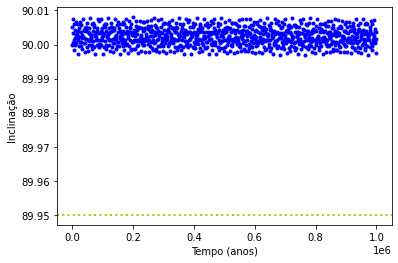

In [18]:
#Definindo variáveis de tempo para os plots
TNO_t2 = TNO2['Tempo (anos)']
Netuno_t2 = Netuno2['Tempo (anos)']
#Criando variável longitude do pericentro (do TNO) --> teste
TNO_no2 = TNO2['nó']
TNO_arg2 = TNO2['Peri']
TNO_long2 = TNO_no2 + TNO_arg2

TNO_i2 = TNO2['i']


plt.plot(TNO_t2, TNO_i2,'b.')
plt.axhline(89.95, color='y', linestyle='dotted', linewidth=2) # Referência.  Analisar da mesma forma que anteriormente, veremos uma inclinação constante ao longo do tempo. O que indica um estado de equilíbrio nessa angulação.
plt.xlabel('Tempo (anos)')
plt.ylabel('Inclinação')
plt.show()

 - Inclinação aproximadamente constante durante toda a integração

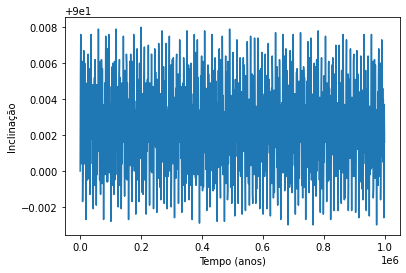

In [19]:
#Muito embora tenhamos várias 'micro' variações (Podemos observar ao nos aproximarmos, mudando a escala do eixo y)
plt.plot(TNO_t2, TNO_i2)
plt.xlabel('Tempo (anos)')
plt.ylabel('Inclinação')
plt.show()

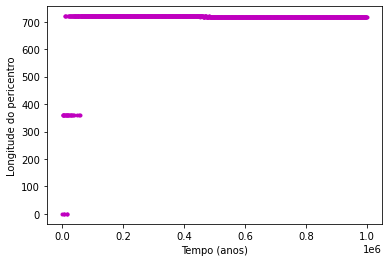

In [20]:
#Plot da longitude do pericentro
plt.plot(TNO_t2, TNO_long2,'m.')
#plt.axvline(24000, color='r', linestyle='dotted', linewidth=2)
plt.xlabel('Tempo (anos)')
plt.ylabel('Longitude do pericentro')
plt.show()

 - Plot da longitude do pericentro já nos indica algo interessante nos primeiros anos de integração. Além disso, mesmo que pareça razoavelmente constante a partir dos 600.000 anos, veremos que não é bem assim.

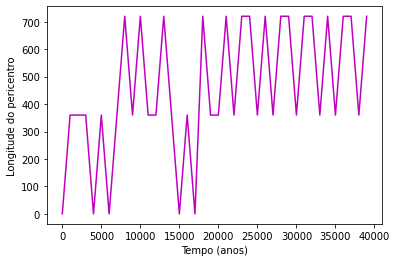

In [21]:
#Plot da longitude do pericentro
plt.plot(TNO_t2[:40], TNO_long2[:40],'m') #Alta variação nos primeiros 40.000 anos
#plt.axvline(24000, color='r', linestyle='dotted', linewidth=2)
plt.xlabel('Tempo (anos)')
plt.ylabel('Longitude do pericentro')
plt.show()

 - A alta variação no início da integração pode ser vista nos primeiros 40.000 anos.

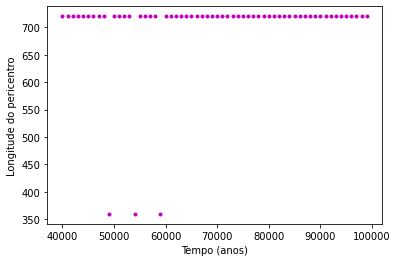

In [22]:
#Encontra certa 'estabilidade' dos 40.000 ~ 100.000 anos, com grandes variações bem pontuais.
plt.plot(TNO_t2[40:100], TNO_long2[40:100],'m.') #Alta variação nos primeiros 40.000 anos
#plt.axvline(24000, color='r', linestyle='dotted', linewidth=2)
plt.xlabel('Tempo (anos)')
plt.ylabel('Longitude do pericentro')
plt.show()

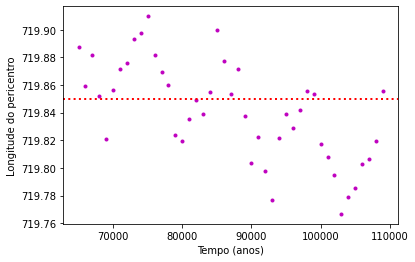

In [23]:
#Sem os pontos esporádicos, será que o valor fica constante constante mesmo?
plt.plot(TNO_t2[65:110], TNO_long2[65:110],'m.') #Alta variação nos primeiros 40.000 anos
plt.axhline(719.85, color='r', linestyle='dotted', linewidth=2)
plt.xlabel('Tempo (anos)')
plt.ylabel('Longitude do pericentro')
plt.show()

 - É, no geral, uma queda. Não há uma época em que o valor flutua entre uma média bem definida. Então considero como não havendo momento em que sua variação é aproximadamente zero.

Se lembrarmos do que isso significa, a variação da longitude do pericentro depende de uma função sen^2(i/2). i=pi/2 significa variação constante, sendo esta constante o valor que depende do semi-exio maior, excentricidade e movimento médio do TNO dividido pela metade. 

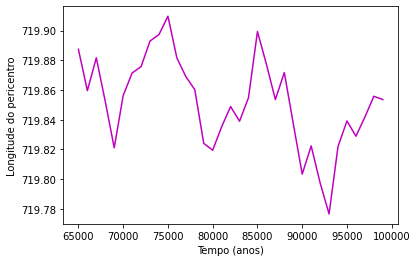

In [24]:
#Mesmo assim, há certas variações se nos aproximarmos (colocar # no axhline)
plt.plot(TNO_t2[65:100], TNO_long2[65:100],'m') 
#plt.axhline(705, color='r', linestyle='dotted', linewidth=2) #Referencia, quanto menor, mais reto parece a função.
plt.xlabel('Tempo (anos)')
plt.ylabel('Longitude do pericentro')
plt.show()

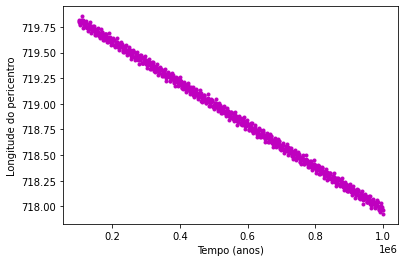

In [25]:
#A partir dos 100.000 anos só há queda, variação negativa. 
plt.plot(TNO_t2[100:], TNO_long2[100:],'m.') #Alta variação nos primeiros 40.000 anos
#plt.axvline(24000, color='r', linestyle='dotted', linewidth=2)
plt.xlabel('Tempo (anos)')
plt.ylabel('Longitude do pericentro')
plt.show()

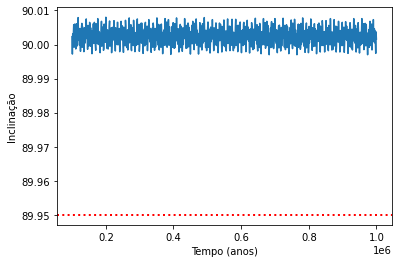

In [26]:
#Enquanto a partir dos 100.000 anos para inclinação não há mudança alguma
plt.plot(TNO_t2[100:], TNO_i2[100:])
plt.axhline(89.95, color='r', linestyle='dotted', linewidth=2)
plt.xlabel('Tempo (anos)')
plt.ylabel('Inclinação')
plt.show()

 - Ou seja, a janela de tempo em que sua longitude de pericentro fica razoavelmente constante é entre 65.000~100.000 anos

 - Opa, nem mesmo nessa janela de tempo há uma média consistente...

 - Mesmo assim, podemos comparar com o gráfico da Inclinação nesse mesmo período de tempo para ver se há alguma correlação:

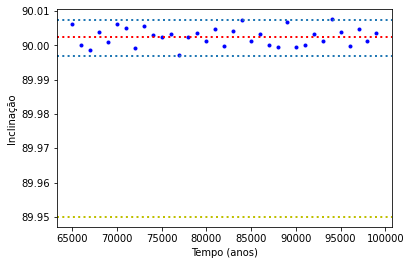

In [27]:
plt.plot(TNO_t2[65:100], TNO_i2[65:100],'b.')
plt.axhline(89.95, color='y', linestyle='dotted', linewidth=2) # Referencia
plt.axhline(90.0075, linestyle='dotted', linewidth=2) # Máximo
plt.axhline(90.0025, color='r', linestyle='dotted', linewidth=2) # Médio
plt.axhline(89.997, linestyle='dotted', linewidth=2) # Mínimo
plt.xlabel('Tempo (anos)')
plt.ylabel('Inclinação')
plt.show()
#Variações pequenas demais, basicamente constante durante todo o tempo. 

 - Não há...

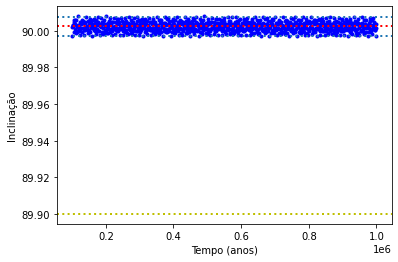

In [28]:
plt.plot(TNO_t2[100:], TNO_i2[100:],'b.')
plt.axhline(89.9, color='y', linestyle='dotted', linewidth=2) # Referência.
plt.axhline(90.0075, linestyle='dotted', linewidth=2) # Máximo
plt.axhline(90.0025, color='r', linestyle='dotted', linewidth=2) # Médio
plt.axhline(89.997, linestyle='dotted', linewidth=2) # Mínimo
plt.xlabel('Tempo (anos)')
plt.ylabel('Inclinação')
plt.show()

 - A partir dos 100.000 anos (quando a longitude tem derivada negativa), temos uma inclinação com variação quase identica, ou seja, aproximadamente constante.

 - Na verdade isso expõe ainda mais a validade da eq de Lagrange, já que sabemos que pra i=pi/2 teremos uma variação que depende da excentricidade, semi-eixo maior e movimento médio do TNO. Ou seja, esperamos variação consistente, enquanto i permanecer neste valor, e é o que temos.

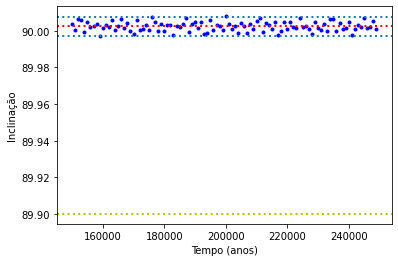

In [29]:
# Dando zoom...
plt.plot(TNO_t2[150:250], TNO_i2[150:250],'b.')
plt.axhline(89.9, color='y', linestyle='dotted', linewidth=2) # Referência.
plt.axhline(90.0075, linestyle='dotted', linewidth=2) # Máximo
plt.axhline(90.0025, color='r', linestyle='dotted', linewidth=2) # Médio
plt.axhline(89.997, linestyle='dotted', linewidth=2) # Mínimo
plt.xlabel('Tempo (anos)')
plt.ylabel('Inclinação')
plt.show()

 - Vale notar também que quando chegamos na inclinação 90°, as pertubações de Netuno já não alteram mais a inclinação do corpo, mas a longitude do pericentro sofre várias variações. 
    Já quando a inclinação é 0, há um aumento constante do seu ângulo, enquanto a longitude do pericentro começa a sair da sua estabilidade e vai, pouco a pouco, variando ao longo do tempo.

 ### Simulação 3
    - Para o caso do mesmo TNO tendo Inclinação inicial 45° (pi/4) , agora só por diversão...

In [30]:
df_n3 = pd.read_csv('../Mercury/Mercury2017/Netuno3.aei', header = 1, delim_whitespace=True)
df_t3 = pd.read_csv('../Mercury/Mercury2017/TNO3.aei', header = 1, delim_whitespace=True)

elements_n3 = pd.DataFrame(data = df_n3.values,columns = ['Tempo (anos)', 'a', 'e', 'i', 'Peri', 'nó', 'M(anomalia)', 'x', 'y', 'z', 'Vx', 'Vy', 'Vz', 'Massa','Ghost'])
Netuno3 = elements_n3.drop(columns='Ghost')

elements_t3 = pd.DataFrame(data = df_t3.values,columns = ['Tempo (anos)', 'a', 'e', 'i', 'Peri', 'nó', 'M(anomalia)', 'x', 'y', 'z', 'Vx', 'Vy', 'Vz', 'Massa','Ghost'])
TNO3 = elements_t3.drop(columns='Ghost')

Netuno3

,Tempo (anos),a,e,i,Peri,nó,M(anomalia),x,y,z,Vx,Vy,Vz,Massa
0,0.0,30.0,0.008600,1.77,264.9999,44.97,0.0001,19.0959,-22.7837,-0.9152,0.0024,0.0020,-0.0000,0.000051
1,1000.0,30.0,0.008600,1.77,265.0092,44.97,30.8962,28.2125,-9.4962,-0.8238,0.0010,0.0030,0.0000,0.000051
2,2000.0,30.0,0.008599,1.77,265.0154,44.97,61.7955,29.1487,6.5507,-0.4934,-0.0007,0.0031,0.0001,0.000051
3,3000.0,30.0,0.008597,1.77,265.0168,44.97,92.6994,21.7101,20.7252,-0.0210,-0.0021,0.0023,0.0001,0.000051
4,4000.0,30.0,0.008596,1.77,265.0135,44.97,123.6081,8.1078,29.0298,0.4576,-0.0030,0.0009,0.0001,0.000051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996000.0,30.0,0.008595,1.77,264.9986,44.97,181.7930,-20.1304,22.5704,0.9331,-0.0023,-0.0021,0.0000,0.000051
997,997000.0,30.0,0.008595,1.77,264.9905,44.97,212.7065,-28.7523,9.2586,0.8304,-0.0009,-0.0030,-0.0000,0.000051
998,998000.0,30.0,0.008596,1.77,264.9844,44.97,243.6180,-29.3748,-6.6234,0.4967,0.0007,-0.0030,-0.0001,0.000051
999,999000.0,30.0,0.008597,1.77,264.9822,44.97,274.5257,-21.7496,-20.6365,0.0238,0.0022,-0.0023,-0.0001,0.000051


In [31]:
TNO3

,Tempo (anos),a,e,i,Peri,nó,M(anomalia),x,y,z,Vx,Vy,Vz,Massa
0,0.0,70.00000,0.200000,45.0000,360.0000,0.0000,0.0000,56.0000,0.0000,0.0000,0.0000,0.0018,0.0018,0.0
1,1000.0,69.98372,0.199814,45.0031,0.0037,0.0014,254.9441,-43.9949,-43.8024,-43.8060,0.0017,-0.0006,-0.0006,0.0
2,2000.0,69.97673,0.199854,45.0046,0.0380,359.9915,149.8538,-77.2870,20.6625,20.6543,-0.0007,-0.0011,-0.0011,0.0
3,3000.0,70.00188,0.199954,44.9997,0.0886,359.9886,44.7263,27.0767,39.2582,39.2632,-0.0019,0.0009,0.0009,0.0
4,4000.0,69.97697,0.199845,45.0021,0.0643,359.9885,299.6486,8.6416,-45.8870,-45.8886,0.0021,0.0005,0.0005,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996000.0,69.99691,0.200066,44.9153,3.3469,356.5385,100.1239,-39.8620,46.1951,43.5750,-0.0018,-0.0004,-0.0005,0.0
997,997000.0,69.97078,0.200014,44.9195,3.3131,356.5329,355.1011,55.6291,-6.2688,-2.8850,0.0002,0.0018,0.0018,0.0
998,998000.0,69.99287,0.200037,44.9147,3.2885,356.5263,250.0685,-47.9527,-41.1984,-43.8974,0.0016,-0.0007,-0.0006,0.0
999,999000.0,69.99032,0.200079,44.9151,3.3147,356.5278,144.9659,-75.4014,25.3466,20.6720,-0.0008,-0.0010,-0.0011,0.0


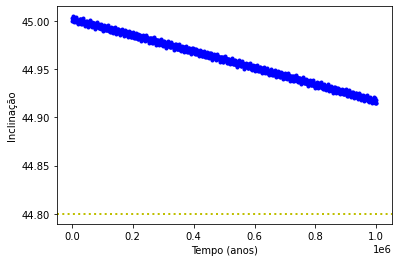

In [32]:
#Definindo variáveis de tempo para os plots
TNO_t3 = TNO3['Tempo (anos)']
Netuno_t3 = Netuno3['Tempo (anos)']
#Criando variável longitude do pericentro (do TNO) --> teste
TNO_no3 = TNO3['nó']
TNO_arg3 = TNO3['Peri']
TNO_long3 = TNO_no3 + TNO_arg3

TNO_i3 = TNO3['i']


plt.plot(TNO_t3, TNO_i3,'b.')
plt.axhline(44.8, color='y', linestyle='dotted', linewidth=2) # Referência.  Analisar da mesma forma que anteriormente, veremos uma inclinação constante ao longo do tempo. O que indica um estado de equilíbrio nessa angulação.
plt.xlabel('Tempo (anos)')
plt.ylabel('Inclinação')
plt.show()

 - Perceptivel uma leve queda da inclinação ao longo do tempo, talvez uma pertubação que queira jogar a i = 0°

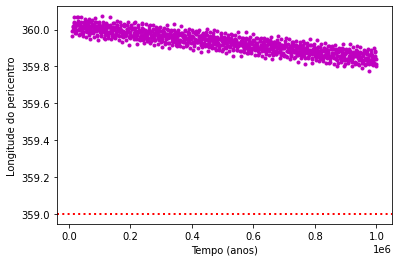

In [33]:
#Plot da longitude do pericentro
plt.plot(TNO_t3[10:], TNO_long3[10:],'m.')
plt.axhline(359, color='r', linestyle='dotted', linewidth=2)
plt.xlabel('Tempo (anos)')
plt.ylabel('Longitude do pericentro')
plt.show()

## Simulação 4 (Integração ainda curta)

 - Integração de 10.000.000 anos. Mostra-se ainda curta para a análise que queremos fazer

In [34]:
df_n4 = pd.read_csv('../Mercury/Mercury2017/Netuno4.aei', header = 1, delim_whitespace=True)
df_t4 = pd.read_csv('../Mercury/Mercury2017/TNO4.aei', header = 1, delim_whitespace=True)

elements_n4 = pd.DataFrame(data = df_n4.values,columns = ['Tempo (anos)', 'a', 'e', 'i', 'Peri', 'nó', 'M(anomalia)', 'x', 'y', 'z', 'Vx', 'Vy', 'Vz', 'Massa','Ghost'])
Netuno4 = elements_n4.drop(columns='Ghost')

elements_t4 = pd.DataFrame(data = df_t4.values,columns = ['Tempo (anos)', 'a', 'e', 'i', 'Peri', 'nó', 'M(anomalia)', 'x', 'y', 'z', 'Vx', 'Vy', 'Vz', 'Massa','Ghost'])
TNO4 = elements_t4.drop(columns='Ghost')

Netuno4

,Tempo (anos),a,e,i,Peri,nó,M(anomalia),x,y,z,Vx,Vy,Vz,Massa
0,0.0,30.0,0.008600,1.77,264.9999,44.97,0.0001,19.0959,-22.7837,-0.9152,0.0024,0.0020,-0.0000,0.000051
1,1000.0,30.0,0.008600,1.77,265.0092,44.97,30.8962,28.2125,-9.4962,-0.8238,0.0010,0.0030,0.0000,0.000051
2,2000.0,30.0,0.008599,1.77,265.0154,44.97,61.7955,29.1487,6.5507,-0.4934,-0.0007,0.0031,0.0001,0.000051
3,3000.0,30.0,0.008597,1.77,265.0168,44.97,92.6994,21.7101,20.7252,-0.0210,-0.0021,0.0023,0.0001,0.000051
4,4000.0,30.0,0.008596,1.77,265.0135,44.97,123.6081,8.1078,29.0298,0.4576,-0.0030,0.0009,0.0001,0.000051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996000.0,30.0,0.008599,1.77,265.0044,44.97,50.5065,29.8232,0.6561,-0.6370,-0.0000,0.0032,0.0001,0.000051
9997,9997000.0,30.0,0.008598,1.77,265.0077,44.97,81.4087,25.3076,16.0408,-0.2020,-0.0017,0.0027,0.0001,0.000051
9998,9998000.0,30.0,0.008596,1.77,265.0060,44.97,112.3158,13.5748,26.8633,0.2908,-0.0028,0.0014,0.0001,0.000051
9999,9999000.0,30.0,0.008595,1.77,265.0004,44.97,143.2268,-1.9847,30.1339,0.7021,-0.0031,-0.0002,0.0001,0.000051


In [35]:
TNO4

,Tempo (anos),a,e,i,Peri,nó,M(anomalia),x,y,z,Vx,Vy,Vz,Massa
0,0.0,70.00000,0.200000,45.0000,360.0000,0.0000,0.0000,56.0000,0.0000,0.0000,0.0000,0.0018,0.0018,0.0
1,1000.0,69.98372,0.199814,45.0031,0.0037,0.0014,254.9441,-43.9949,-43.8024,-43.8060,0.0017,-0.0006,-0.0006,0.0
2,2000.0,69.97673,0.199854,45.0046,0.0380,359.9915,149.8538,-77.2870,20.6625,20.6543,-0.0007,-0.0011,-0.0011,0.0
3,3000.0,70.00188,0.199954,44.9997,0.0886,359.9886,44.7263,27.0767,39.2582,39.2632,-0.0019,0.0009,0.0009,0.0
4,4000.0,69.97697,0.199845,45.0021,0.0643,359.9885,299.6486,8.6416,-45.8870,-45.8886,0.0021,0.0005,0.0005,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996000.0,69.98081,0.206367,43.9709,32.5582,324.9317,99.5829,-41.5817,58.1674,22.8802,-0.0016,-0.0002,-0.0011,0.0
9997,9997000.0,70.00092,0.206560,43.9674,32.5695,324.9313,354.5318,50.9696,-15.8139,15.7633,0.0001,0.0020,0.0016,0.0
9998,9998000.0,69.97455,0.206446,43.9691,32.5891,324.9265,249.4292,-40.3726,-39.0393,-53.2000,0.0015,-0.0010,0.0001,0.0
9999,9999000.0,69.99115,0.206310,43.9662,32.5803,324.9223,144.3315,-71.7230,39.9818,-8.1970,-0.0007,-0.0010,-0.0012,0.0


In [36]:
#Criando variável longitude do pericentro (do TNO) --> teste
TNO_no4 = TNO4['nó']
TNO_arg4 = TNO4['Peri']
TNO_long4 = TNO_no4 + TNO_arg4
TNO_e4 = TNO4['e']
TNO_t4 = TNO4['Tempo (anos)']
Netuno_t4 = Netuno4['Tempo (anos)']

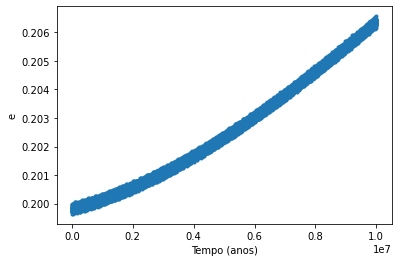

In [37]:
plt.plot(TNO_t4, TNO_e4,'.')
#plt.axvline(24000, color='r', linestyle='dotted', linewidth=2)
plt.xlabel('Tempo (anos)')
plt.ylabel('e')
plt.show()

 - Devemos aumentar a integralização 

## Simulação 5 
 - Integração de 400.000.000 anos de 10.000 em 10.000 anos

In [38]:
df_n5 = pd.read_csv('../Mercury/Mercury2017/Netuno5.aei', header = 1, delim_whitespace=True)
df_t5 = pd.read_csv('../Mercury/Mercury2017/TNO5.aei', header = 1, delim_whitespace=True)

elements_n5 = pd.DataFrame(data = df_n5.values,columns = ['Tempo (anos)', 'a', 'e', 'i', 'Peri', 'nó', 'M(anomalia)', 'x', 'y', 'z', 'Vx', 'Vy', 'Vz', 'Massa','Ghost'])
Netuno5 = elements_n5.drop(columns='Ghost')

elements_t5 = pd.DataFrame(data = df_t5.values,columns = ['Tempo (anos)', 'a', 'e', 'i', 'Peri', 'nó', 'M(anomalia)', 'x', 'y', 'z', 'Vx', 'Vy', 'Vz', 'Massa','Ghost'])
TNO5 = elements_t5.drop(columns='Ghost')

Netuno5

,Tempo (anos),a,e,i,Peri,nó,M(anomalia),x,y,z,Vx,Vy,Vz,Massa
0,0.000000e+00,30.0,0.008600,1.77,264.9999,44.97,0.0001,19.0959,-22.7837,-0.9152,0.0024,0.0020,-0.0000,0.000051
1,1.000000e+06,30.0,0.008599,1.77,264.9847,44.97,305.4285,-7.9447,-28.7717,-0.4555,0.0030,-0.0008,-0.0001,0.000051
2,2.000000e+06,30.0,0.008596,1.77,264.9826,44.97,250.8440,-28.2912,-10.2300,0.3942,0.0011,-0.0029,-0.0001,0.000051
3,3.000000e+06,30.0,0.008595,1.77,264.9928,44.97,196.2470,-25.0479,16.9318,0.9172,-0.0017,-0.0026,-0.0000,0.000051
4,4.000000e+06,30.0,0.008595,1.77,265.0062,44.97,141.6468,-1.1673,30.1727,0.6851,-0.0031,-0.0001,0.0001,0.000051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.995000e+09,30.0,0.008602,1.77,255.8053,44.97,0.0866,15.2477,-25.5205,-0.8909,0.0027,0.0016,-0.0000,0.000051
9996,9.996000e+09,30.0,0.008600,1.77,255.7901,44.97,305.4801,-12.4147,-27.1458,-0.3223,0.0029,-0.0013,-0.0001,0.000051
9997,9.997000e+09,30.0,0.008598,1.77,255.7879,44.97,250.8606,-29.5586,-5.5871,0.5234,0.0006,-0.0031,-0.0001,0.000051
9998,9.998000e+09,30.0,0.008597,1.77,255.7981,44.97,196.2286,-22.0121,20.7250,0.9338,-0.0021,-0.0023,-0.0000,0.000051


In [39]:
TNO5

,Tempo (anos),a,e,i,Peri,nó,M(anomalia),x,y,z,Vx,Vy,Vz,Massa
0,0.000000e+00,70.00000,0.200000,0.0000,0.0000,0.0000,0.0000,56.0000,0.0000,0.0000,0.0000,0.0025,0.0000,0.0
1,1.000000e+06,69.97074,0.199290,0.2284,234.9696,132.2355,62.1709,-1.8781,65.8891,-0.1710,-0.0022,0.0004,0.0000,0.0
2,2.000000e+06,69.99216,0.198689,0.4545,246.1167,128.3472,124.2402,-71.9630,33.5699,0.2825,-0.0010,-0.0015,0.0000,0.0
3,3.000000e+06,69.98800,0.198118,0.6781,257.2432,124.4539,186.3496,-75.2870,-36.7756,0.9810,0.0008,-0.0015,0.0000,0.0
4,4.000000e+06,69.97256,0.197811,0.8985,268.4269,120.5467,248.4204,-15.4762,-75.5842,0.8115,0.0019,-0.0001,-0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.995000e+09,69.98419,0.195778,1.5828,88.3027,108.6437,202.2921,70.0776,44.3504,-2.2266,-0.0010,0.0014,0.0000,0.0
9996,9.996000e+09,69.97210,0.196413,1.7815,99.4578,104.8356,264.3064,3.5469,73.7834,-0.6942,-0.0019,-0.0003,0.0001,0.0
9997,9.997000e+09,70.00300,0.197182,1.9736,110.5411,100.9971,326.3924,-56.7792,17.9926,1.8024,-0.0004,-0.0024,0.0000,0.0
9998,9.998000e+09,69.97732,0.197515,2.1593,121.6797,97.1621,28.4112,-9.3283,-57.8892,0.6211,0.0023,-0.0007,-0.0001,0.0


In [40]:
#Criando variável longitude do pericentro (do TNO) --> teste
TNO_no5 = TNO5['nó']
TNO_arg5 = TNO5['Peri']
TNO_long5 = TNO_no5 + TNO_arg5
TNO_e5 = TNO5['e']
TNO_t5 = TNO5['Tempo (anos)']
Netuno_t5 = Netuno5['Tempo (anos)']
TNO_i5=TNO5['i']

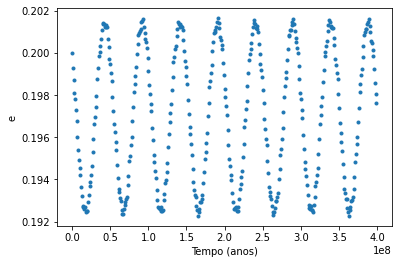

In [45]:
plt.plot(TNO_t5[:400], TNO_e5[:400],'.')
#plt.axvline(24000, color='r', linestyle='dotted', linewidth=2)
plt.xlabel('Tempo (anos)')
plt.ylabel('e')
plt.show()

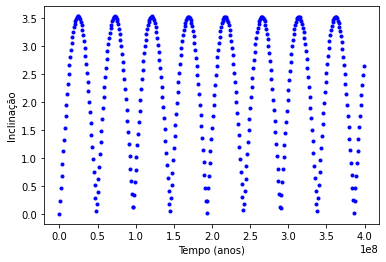

In [46]:
plt.plot(TNO_t5[:400], TNO_i5[:400],'b.')
#plt.axhline(44.8, color='y', linestyle='dotted', linewidth=2) # Referência.  Analisar da mesma forma que anteriormente, veremos uma inclinação constante ao longo do tempo. O que indica um estado de equilíbrio nessa angulação.
plt.xlabel('Tempo (anos)')
plt.ylabel('Inclinação')
plt.show()

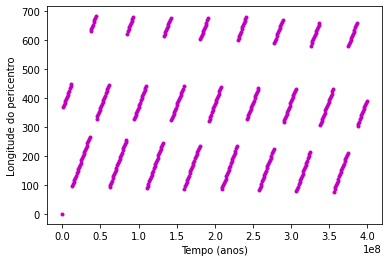

In [49]:
plt.plot(TNO_t5[:400], TNO_long5[:400],'m.')
#plt.axhline(44.8, color='y', linestyle='dotted', linewidth=2) # Referência.  Analisar da mesma forma que anteriormente, veremos uma inclinação constante ao longo do tempo. O que indica um estado de equilíbrio nessa angulação.
plt.xlabel('Tempo (anos)')
plt.ylabel('Longitude do pericentro')
plt.show()

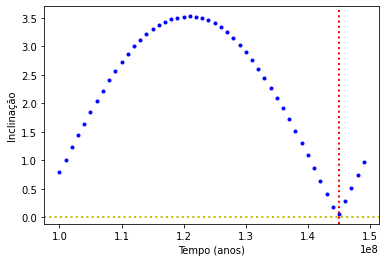

In [56]:
plt.plot(TNO_t5[100:150], TNO_i5[100:150],'b.')
plt.axhline(0.001, color='y', linestyle='dotted', linewidth=2) 
plt.axvline(145000000, color='r', linestyle='dotted', linewidth=2)
plt.xlabel('Tempo (anos)')
plt.ylabel('Inclinação')
plt.show()

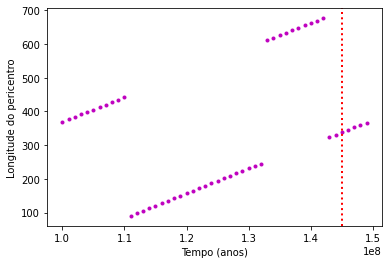

In [57]:
plt.plot(TNO_t5[100:150], TNO_long5[100:150],'m.')
#plt.axhline(44.8, color='y', linestyle='dotted', linewidth=2) 
plt.axvline(145000000, color='r', linestyle='dotted', linewidth=2)
plt.xlabel('Tempo (anos)')
plt.ylabel('Longitude do pericentro')
plt.show()

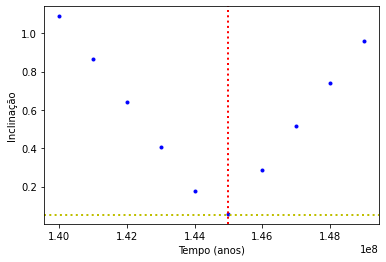

In [65]:
plt.plot(TNO_t5[140:150], TNO_i5[140:150],'b.')
plt.axhline(0.05, color='y', linestyle='dotted', linewidth=2) # Valor da inclinação mínima
plt.axvline(145000000, color='r', linestyle='dotted', linewidth=2) #Tempo da inclinação mínima
plt.xlabel('Tempo (anos)')
plt.ylabel('Inclinação')
plt.show()

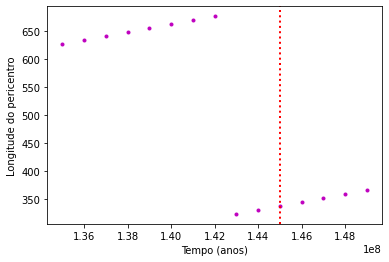

In [58]:
plt.plot(TNO_t5[135:150], TNO_long5[135:150],'m.')
#plt.axhline(44.8, color='y', linestyle='dotted', linewidth=2)
plt.axvline(145000000, color='r', linestyle='dotted', linewidth=2) # Tempo da inclinação mínima
plt.xlabel('Tempo (anos)')
plt.ylabel('Longitude do pericentro')
plt.show()

 - Épocas em que a inclinação se aproxima de 0, a longitude do pericentro deve ter variação próxima de zero também. 

 - Comparando variação da longitude do pericentro em épocas de inclinações maiores e comparar com a variação em épocas de inclinações menores

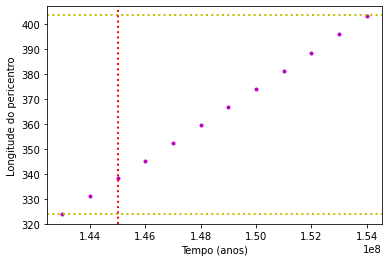

In [82]:
#Variação da long do pericentro quando a inclinação se aproxima de zero
plt.plot(TNO_t5[143:155], TNO_long5[143:155],'m.')
plt.axhline(324, color='y', linestyle='dotted', linewidth=2)
plt.axhline(403.5, color='y', linestyle='dotted', linewidth=2)
plt.axvline(145000000, color='r', linestyle='dotted', linewidth=2) # Tempo da inclinação mínima
plt.xlabel('Tempo (anos)')
plt.ylabel('Longitude do pericentro')
plt.show()

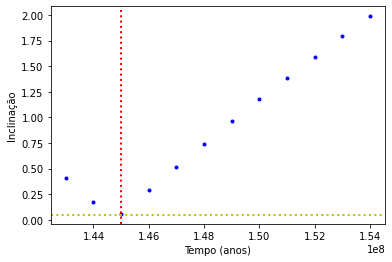

In [83]:
plt.plot(TNO_t5[143:155], TNO_i5[143:155],'b.')
plt.axhline(0.05, color='y', linestyle='dotted', linewidth=2) # Valor da inclinação mínima
plt.axvline(145000000, color='r', linestyle='dotted', linewidth=2) #Tempo da inclinação mínima
plt.xlabel('Tempo (anos)')
plt.ylabel('Inclinação')
plt.show()

 - Variação de aproximadamente 79,5° na longitude do pericentro entre os 1.43 ~ 1.54   cem milhões de anos. Época essa que a inclinação cai de 0.5° até 0° e depois sobe para 2°

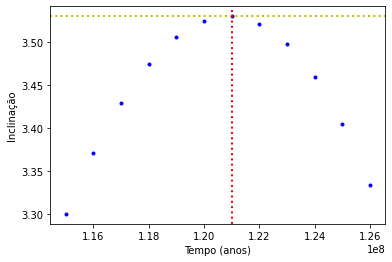

In [96]:
plt.plot(TNO_t5[115:127], TNO_i5[115:127],'b.')
plt.axhline(3.53, color='y', linestyle='dotted', linewidth=2) # Valor da inclinação máxima
plt.axvline(121000000, color='r', linestyle='dotted', linewidth=2) #Tempo da inclinação máxima
plt.xlabel('Tempo (anos)')
plt.ylabel('Inclinação')
plt.show()

 - Na mesma diferença de tempo, pegamos a variação da longitude numa época de alta para a inclinação

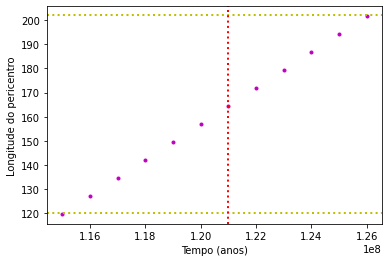

In [106]:
#Variação da long do pericentro quando a inclinação se aproxima de zero
plt.plot(TNO_t5[115:127], TNO_long5[115:127],'m.')
plt.axhline(120.2, color='y', linestyle='dotted', linewidth=2)
plt.axhline(202, color='y', linestyle='dotted', linewidth=2)
plt.axvline(121000000, color='r', linestyle='dotted', linewidth=2) #Tempo da inclinação máxima
plt.xlabel('Tempo (anos)')
plt.ylabel('Longitude do pericentro')
plt.show()

 - Variação de aproximadamente 82° quando a inclinação se aproxima do valor máximo de 3.53°  (entre os 1.15 ~ 1.26 cem milhões de anos)

#### Conclusão:

Observamos um aumento da variação da longitude do pericentro quando a inclinação assume valores maiores. Nessa simulação, por termos escolhido inclinação 0° como condição inicial do TNO, não observamos variações da inclinação maiores que o máximo de 3.53° , que ainda é uma inclinação baixa. Ou seja, a diferença da variação do pericentro não é muito grande. Mas já é possível observarmos a validade da equação de Lagrange para o tipo de previsão sobre os elementos orbitais e suas variações.